# Biased coexistence simulations for ice III

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit
import os.path

In [2]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (15, 10)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

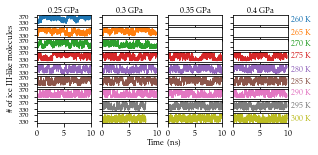

In [42]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (4.5, 2)


pressures=np.array([2500,3000,3500,4000])
temps=np.array([260,265,270,275,280,285,290,295,300])
fig, axs = plt.subplots(temps.shape[0],pressures.shape[0],sharex=True,sharey=True)
counter1=0
for press in pressures:
    counter2=0
    for temp in temps:
        file="IceIII-" + str(temp) + ".0-" + str(press) + '.0/COLVAR.0'
        #print(file)
        axs[counter2,counter1].set_ylim([315,385])
        axs[counter2,counter1].set_xlim([0,10])
        axs[counter2,counter1].set_yticks([330,370])
        axs[counter2,counter1].tick_params(axis='y', which='major', labelsize=7)
        if(os.path.exists(file)):
            data = np.genfromtxt(file)
            axs[counter2,counter1].plot(data[:,0]/1000,data[:,1],color=colors[counter2],linewidth=0.5)
        counter2 += 1
    counter1 += 1
for i in range(pressures.shape[0]):
    axs[0,i].text(5,410,str(pressures[i]/10000)+ ' GPa',va='center',ha='center')
for i in range(temps.shape[0]):
    axs[i,pressures.shape[0]-1].text(12.5,345,str(temps[i])+ ' K',va='center',ha='center',color=colors[i])


axs[temps.shape[0]-1,int(pressures.shape[0]/2)].xaxis.set_label_coords(-0.075, -1.6)
axs[temps.shape[0]-1,int(pressures.shape[0]/2)].set_xlabel("Time (ns)") #,labelpad=5)

axs[int(temps.shape[0]/2),0].set_ylabel(r"\# of ice III-like molecules")

#plt.tight_layout()
plt.savefig("1-traj.pdf",bbox_inches='tight')  # publication quality

plt.show()

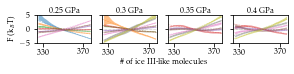

In [44]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (4.5, 0.5)

def func(x,a,b):
    return a*x+b

fig, axs = plt.subplots(1,pressures.shape[0],sharex=True,sharey=True)

counter1=0
for press in pressures:
    counter2=0
    for temp in temps:
        file="IceIII-" + str(temp) + ".0-" + str(press) + '.0/COLVAR.0'
        if(os.path.exists(file)):
            data = np.genfromtxt(file)
            ignore=int(data.shape[0]/4)
            bias= data[ignore:,3]
            cv=data[ignore:,1]
            if (cv.shape[0]>0):
                beta=1./(0.00831441001626*temp)
                logweights=beta*bias
                logweights -= np.amax(logweights)
                nbins=20
                histmin=324
                histmax=378
                histo, bin_edges = np.histogram(cv,weights=np.exp(logweights),bins=nbins,range=(histmin,histmax))
                err = np.sqrt(np.histogram(cv,weights=np.power(np.exp(logweights),2),bins=nbins,range=(histmin,histmax))[0])
                bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
                fes = -np.log(histo)
                offset = np.mean(np.ma.masked_invalid(fes))
                fes -= offset
                axs[counter1].set_xlim([histmin,histmax])
                axs[counter1].set_xticks([330,370])
                axs[counter1].set_ylim([-5,5])
                feserr = err/histo
                axs[counter1].fill_between(bin_centers,fes-10*feserr,fes+10*feserr,color=colors[counter2],linewidth=0,alpha=0.5)
            if (fes[np.isfinite(fes)].shape[0]>0):
                popt, pcov = curve_fit(func, bin_centers[np.isfinite(fes)], fes[np.isfinite(fes)], sigma=2*feserr[np.isfinite(fes)])
                x=np.linspace(histmin,histmax,10)
                axs[counter1].plot(x,func(x,*popt),'--',alpha=0.5,color=colors[counter2],linewidth=0.5)
        counter2 += 1
    axs[counter1].plot([histmin,histmax],[0,0],':',alpha=0.5,color='black',zorder=0,linewidth=0.5)
    counter1 += 1
    
for i in range(pressures.shape[0]):
    axs[i].text(351,6.6,str(pressures[i]/10000)+ ' GPa',va='center',ha='center')
    
axs[int(pressures.shape[0]/2)].xaxis.set_label_coords(-0.075, -0.6)
axs[int(pressures.shape[0]/2)].set_xlabel(r"\# of ice III-like molecules")
axs[0].set_ylabel("F (k$_B$T)")

plt.savefig("2-fes.pdf",bbox_inches='tight')  # publication quality

plt.show()

[283.8939591  282.21971228 278.66139333 275.51212852] [4000. 3500. 3000. 2500.] [2.73633114 2.60421191 2.11777535 2.4877346 ]


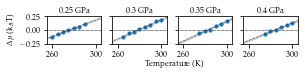

In [46]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (4.5, 0.5)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#ignore=1*4000

def func2(x,a,x0):
    return a*(x-x0)

pressures=np.array([2500,3000,3500,4000])
temps=np.array([260,265,270,275,280,285,290,295,300])

fig, axs = plt.subplots(1,pressures.shape[0],sharex=True,sharey=True)
counter1=0
melt_temp=np.zeros(0)
melt_temp_errors=np.zeros(0)
melt_temp_pressures=np.zeros(0)
for press in pressures:
    counter2=0
    chem_pot=np.zeros(0)
    chem_pot_temps=np.zeros(0)
    for temp in temps:
        file="IceIII-" + str(temp) + ".0-" + str(press) + '.0/COLVAR.0'
        if(os.path.exists(file)):
            data = np.genfromtxt(file)
            ignore=int(data.shape[0]/4)
            bias=data[ignore:,3]
            cv=data[ignore:,1]
            if (cv.shape[0]>0):
                beta=1./(0.00831441001626*temp)
                logweights=beta*bias
                logweights -= np.amax(logweights)
                nbins=20
                histmin=324
                histmax=378
                histo, bin_edges = np.histogram(cv,weights=np.exp(logweights),bins=nbins,range=(histmin,histmax))
                err = np.sqrt(np.histogram(cv,weights=np.power(np.exp(logweights),2),bins=nbins,range=(histmin,histmax))[0])
                bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
                fes = -np.log(histo)
                offset = np.mean(np.ma.masked_invalid(fes))
                fes -= offset
                feserr = err/histo
                popt, pcov = curve_fit(func, bin_centers[np.isfinite(fes)], fes[np.isfinite(fes)], sigma=2*feserr[np.isfinite(fes)])
                axs[counter1].scatter(temp,popt[0],s=10,color=colors[0])
                chem_pot=np.insert(chem_pot,0,popt[0])
                chem_pot_temps=np.insert(chem_pot_temps,0,temp)
        counter2 += 1
        axs[counter1].plot([255,305],[0,0],':',color='black',alpha=0.25,zorder=0,linewidth=0.5)
        axs[counter1].set_xlim([255,305])
        axs[counter1].set_xticks([260,300])
        axs[counter1].set_ylim([-0.25,0.25])
    if (chem_pot_temps.shape[0]>0):
        popt, pcov = curve_fit(func2, chem_pot_temps, chem_pot, sigma=np.ones(chem_pot.shape[0])*0.05, absolute_sigma=True)
        perr = np.sqrt(np.diag(pcov))
        x=np.linspace(temps[0]-10,temps[-1]+10,10)
        axs[counter1].plot(x,func2(x,*popt),'--',color='black',alpha=0.5,linewidth=0.75)
        melt_temp=np.insert(melt_temp,0,popt[1])
        melt_temp_pressures=np.insert(melt_temp_pressures,0,press)
        melt_temp_errors=np.insert(melt_temp_errors,0,perr[1])
        axs[counter1].fill_between(x,func2(x,popt[0],popt[1]-perr[1]),func2(x,popt[0],popt[1]+perr[1]),linewidth=0.,color='black',alpha=0.2,zorder=0)
        counter1 += 1
    
print(melt_temp,melt_temp_pressures,melt_temp_errors)


for i in range(pressures.shape[0]):
    axs[i].text(280,0.35,str(pressures[i]/10000)+ ' GPa',va='center',ha='center')
    

axs[int(pressures.shape[0]/2)].xaxis.set_label_coords(-0.075, -0.6)
axs[int(pressures.shape[0]/2)].set_xlabel("Temperature (K)")
axs[0].set_ylabel("$\Delta\mu$ (k$_B$T)")

plt.savefig("3-deltamu.pdf",bbox_inches='tight')  # publication quality

plt.show()

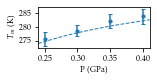

In [47]:
from scipy.interpolate import interp1d, UnivariateSpline

font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (2., 0.75)

plt.errorbar(melt_temp_pressures/10000,melt_temp,melt_temp_errors, ls='none',capsize=2)
plt.scatter(melt_temp_pressures/10000,melt_temp,s=10)

thermo = np.genfromtxt("/projects/CAR/ppiaggi/MishimaProject/ClausiusClapyeron/Results/thermo_condition_iceIII.txt")
f_spline = interp1d(thermo[:,0]/10000,thermo[:,1], kind='cubic',bounds_error=False,fill_value='extrapolate')
x=np.linspace(0.24,0.41,1000)
plt.plot(x,f_spline(x),'--',color=colors[0],linewidth=1)

    
plt.xlabel("P (GPa)")
plt.ylabel("$T_m$ (K)")
plt.xticks([0.25,0.3,0.35,0.4])
plt.xlim([0.24,0.41])

plt.savefig("4-meltingcurve.pdf",bbox_inches='tight')  # publication quality

plt.show()